In [1]:
def adj_matrix_2_list(adj_matrix):
    n = len(adj_matrix)
    adj_list = [[] for i in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            if adj_matrix[i][j] == 1:
                adj_list[i].append(j)
                adj_list[j].append(i)    #變成adj list存每個點的鄰居
            
    return adj_list

def adj_matrix_2_edges(adj_matrix):
    n = len(adj_matrix)
    edges = set()
    for i in range(n):
        for j in range(i+1, n):
            if adj_matrix[i][j] == 1:
                edges.add((i,j))    #存graph內有哪些邊(由兩端點構成)
              
    return edges

import random
def approximation_vertex_cover(adj_matrix):
    adj_list = adj_matrix_2_list(adj_matrix)
    edges = adj_matrix_2_edges(adj_matrix)
    
    vertex_cover = []
    while edges:
        x, y = random.choice(tuple(edges))    #隨機挑一邊
        print(x, y)
        vertex_cover.append(x)  #將邊的兩端點加入vertex cover
        vertex_cover.append(y)
        for adj in adj_list[x]:
            edges.discard((min(x,adj), max(x,adj)))  #將兩端點連接到的邊都從圖中刪除
        for adj in adj_list[y]:
            edges.discard((min(y,adj), max(y,adj)))
            
    size = len(vertex_cover)
    count[size -1] =count[size -1] + 1    #將vertex cover size出現頻率存入count ex:count[6]=3代表size為6的出現過3次S
            
    print("size: ", len(vertex_cover))
    print("-----------")

In [2]:
graph = [[0, 1, 1, 1, 0, 0, 0, 0],
         [1, 0, 1, 0, 1, 0, 0, 0],
         [1, 1, 0, 1, 0, 1, 0, 0],
         [1, 0, 1, 0, 0, 0, 1, 0],
         [0, 1, 0, 0, 0, 1, 0, 1],
         [0, 0, 1, 0, 1, 0, 1, 1],
         [0, 0, 0, 1, 0, 1, 0, 1],
         [0, 0, 0, 0, 1, 1, 1, 0]]

count = [0 for i in range(len(graph))]
vol = [j+1 for j in range(len(graph))]

for i in range(10):
    print(i+1,"-th round:")
    approximation_vertex_cover(graph)
    

1 -th round:
0 1
3 6
4 5
size:  6
-----------
2 -th round:
6 7
4 5
0 1
2 3
size:  8
-----------
3 -th round:
2 5
6 7
0 1
size:  6
-----------
4 -th round:
0 1
2 5
6 7
size:  6
-----------
5 -th round:
4 5
3 6
1 2
size:  6
-----------
6 -th round:
5 7
2 3
1 4
size:  6
-----------
7 -th round:
0 1
4 5
6 7
2 3
size:  8
-----------
8 -th round:
5 6
0 2
4 7
size:  6
-----------
9 -th round:
4 5
1 2
6 7
0 3
size:  8
-----------
10 -th round:
5 6
2 3
0 1
4 7
size:  8
-----------


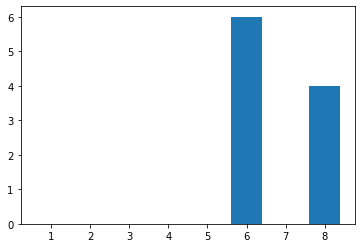

In [3]:
import matplotlib.pyplot as plt

plt.bar(vol, count)
plt.show()